<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Convolutional%20Neural%20Networks/03_multiclass_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Image Classification
# New Section
1. Preprocess Data
2. Create model (start w/ a baseline)
3. Fit model (overfit to make sure it works)
4. Evaluate model
5. Adjust diff hyperparameters and improve model (try to beat baseline/reduce overfitting)


### 1. Import and preprocess data

In [22]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-04 22:52:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  22.8MB/s    in 23s     

2023-08-04 22:52:45 (21.2 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [23]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [24]:
# Setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [25]:
# Getting class names (subdirectories)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [26]:
from re import A
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir + target_class

  # Get rand image path
  random_image = random.sample(os.listdir(target_folder), 1) # randomly sample 1 of the items from here
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show shape of image

  return img

['2198372.jpg']
Image shape: (512, 384, 3)


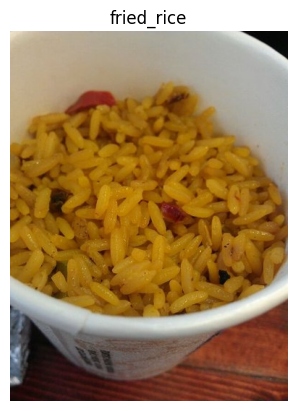

In [27]:
# Visualizing directories
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocessing Data

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale images
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start w/ baseline)

Replicating CNN explainer model TinyVGG architecture
https://poloclub.github.io/cnn-explainer/

In [29]:
import tensorflow as tf

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [31]:
model_8 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

### 4. Fit model

In [32]:
history_8 = model_8.fit(train_data, #now 10 diff classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 134ms/step - loss: 2.1287 - accuracy: 0.2225 - val_loss: 2.0120 - val_accuracy: 0.2892
Epoch 2/5
235/235 [==============================] - 34s 144ms/step - loss: 1.8416 - accuracy: 0.3691 - val_loss: 1.8660 - val_accuracy: 0.3388
Epoch 3/5
235/235 [==============================] - 30s 127ms/step - loss: 1.2872 - accuracy: 0.5764 - val_loss: 2.1204 - val_accuracy: 0.3096
Epoch 4/5
235/235 [==============================] - 31s 132ms/step - loss: 0.5546 - accuracy: 0.8260 - val_loss: 3.0015 - val_accuracy: 0.2780
Epoch 5/5
235/235 [==============================] - 30s 127ms/step - loss: 0.1529 - accuracy: 0.9588 - val_loss: 4.4058 - val_accuracy: 0.2704


### 5. Evaluate model

In [33]:
# Evaluate on test data
model_8.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 4.4058 - accuracy: 0.2704


[4.405761241912842, 0.2703999876976013]

In [34]:
# Plot validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperte loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs were ran

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

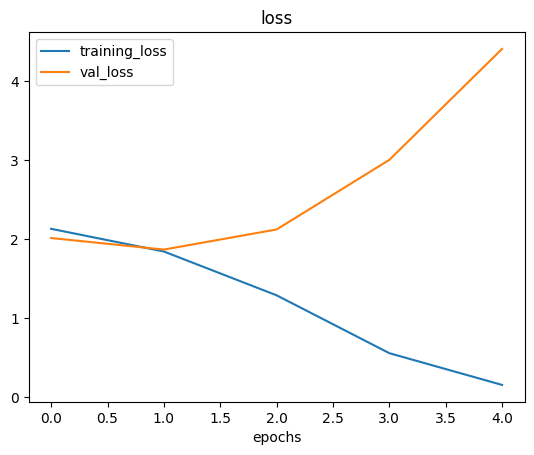

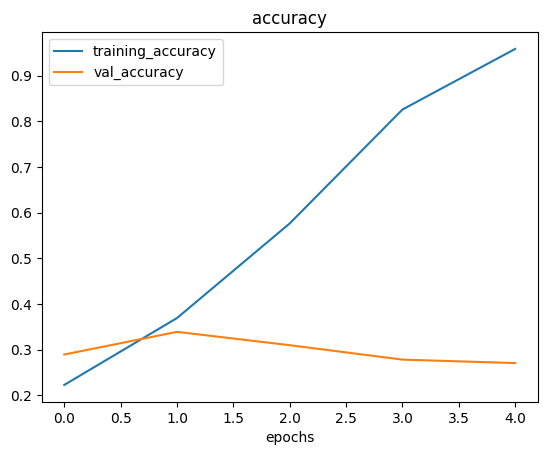

In [35]:
# Check model's loss curves on 10 classes
plot_loss_curves(history_8)

Curves ideally should be similar, but as you can see the validation loss is much worse than the training loss. Signifies that the model is **OVERFITTING** on the training data. In other words, it can fit well on training data, but fails to generalize on unseen data and performs poorly on test dataset.



### 6. Adjust model hyperparameters (to beat baseline/reduce overfitting)

Some ways to reduce overfitting (again):
- add data augmentation - manipulates training data such that it adds diversity to it w/o altering original data
- add more data - gives model more opportunities to learn diverse patterns
- simplify the model - if current model is overfitting the data, it may be too complicated of a model
  - ex. reduce # of layers or reduce # of hidden units in layers
- Use transfer learning - transfer learning leverages patterns another model has already learned on similar data and allowes you to use those patterns on your own dataset

In [36]:
# Try to simplify model - removing 2 Conv2D layers
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# Fit model w/ 2 Conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 135ms/step - loss: 2.1373 - accuracy: 0.2344 - val_loss: 1.9492 - val_accuracy: 0.2940
Epoch 2/5
 89/235 [==========>...................] - ETA: 14s - loss: 1.7306 - accuracy: 0.4137

In [ ]:
# Check loss curves
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

In [ ]:
model_8.summary()

models have similar number of parameters and therefore there isn't much change.

### 6. Data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

